In [1]:
from pyscripts.shp_utils import get_region_and_profile_to_merge, load_shape_file_into_gdf, get_bbox_and_transform, plot_profile_with_regions, add_zone_names_to_ecoregions
import os
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas as gpd

TypeError: clip() got an unexpected keyword argument 'mask'

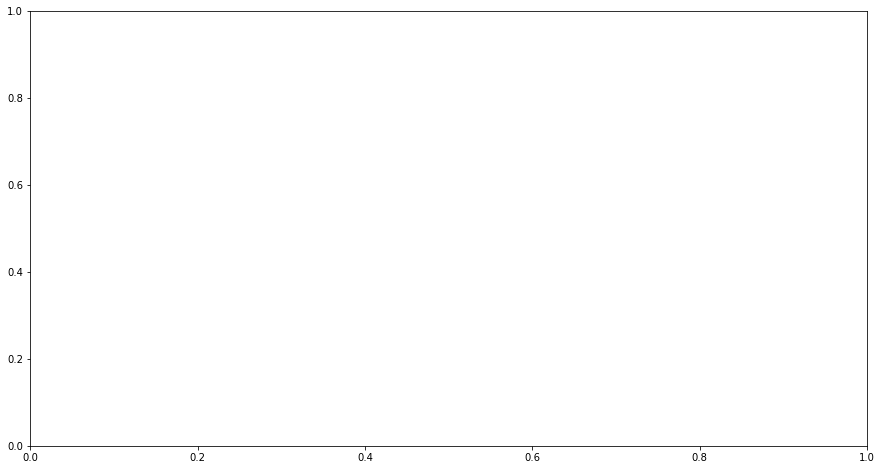

In [6]:
shapes_df, profiles_gdf = get_region_and_profile_to_merge('Uruguay', 'sa_eco_l3')
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(15,8))
base = shapes_df.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(column='LEVEL3', ax = ax)
# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=5)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("PERFILES Y ZONAS ECOLOGICAS - URUGUAY")
plt.show()


In [ ]:
profile_zones = gdf_cross.sjoin(profiles_gdf, predicate='contains')
profile_zones[['GEOFORMA', 'zone_name', 'profile_id', 'clay_pond_val', 'orgc_pond_val', 'bdfi33_pond_val', 'bd_0_30_soilgrids']] \
                .groupby(['GEOFORMA', 'zone_name']).agg({'profile_id':'count',
                                         'clay_pond_val':['mean', 'std'],
                                         'orgc_pond_val':['mean', 'std'],
                                         'bdfi33_pond_val':['mean', 'std'],
                                         'bd_0_30_soilgrids':['mean', 'std']})


In [ ]:
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(20,20))
base = gdf_suelos.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(column='GEOFORMA', ax = ax, legend='GEOFORMA')

gdf_eco.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='yellow', ls=':')

gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])) \\
                .apply(annotate_zone_names, args=(base,), axis=1)

# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=20)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("ZONAS ECOLOGICAS - ZONAS DE SUELO - PERFILES DE SUELO - URUGUAY")

txt="Las lineas de puntos amarillas delimitan las zonas ecologicas. El orden de suelo esta codificado por color. Los perfiles son puntos azules en el mapa
plt.figtext(0.5, 0.08, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(os.path.join('output/PERFILES CON ZONAS DE SUELO Y ECOLOGICAS - URUGUAY.png'))


In [ ]:
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(20,20))

res_union = gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).overlay(gdf_suelos.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])), how='union')
base = res_union.plot(alpha=0.5, cmap='tab10', ax=ax)

gdf_suelos.apply(lambda x: base.annotate(text=x['GEOFORMA'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=5)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("PERFILES Y ZONAS ECOLOGICAS - URUGUAY")
plt.show()


In [ ]:
gdf_eco_no_names = load_shape_file_into_gdf('sa_eco_l3')
gdf_eco = add_zone_names_to_ecoregions(gdf_eco_no_names)
gdf_suelos, profiles_gdf = get_region_and_profile_to_merge('Uruguay', 'zonas_suelo_uy')

#gdf_zones = gdf_suelos.sjoin(gdf_eco, predicate=None).rename({'index_right':'index_eco'}, axis=1).reset_index()
gdf_zones = gdf_suelos.overlay(gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])), how='union')

fig, axes = plt.subplots(1,3, figsize=(12,8))
gdf_eco.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = axes[0])
gdf_suelos.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = axes[1])
gdf_zones.boundary.plot(ax = axes[2])
